# Exploratory Data Analysis

In [17]:
# load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
# load processed data
EHR = pd.read_pickle('ehr_preprocessed_seq_by_day_cat_embedding.pkl')
train_merged_df_latest = pd.read_csv('train_merged_latest_feat.csv')
train_merged_df_median = pd.read_csv('train_merged_median_feat.csv')

In [5]:
# summary statistics
#train_merged_df_latest.describe()
train_merged_df_median.describe()

,subject_id,hadm_id,StudyTime,readmitted_within_30days,age,gender,ethnicity,Y90-Y99,G30-G32,O85-O92,...,CARDIAC DRUGS,PRE-NATAL VITAMINS,ANESTHETICS,ANTIBIOTICS,ANTIHYPERGLYCEMICS,SEDATIVE/HYPNOTICS,ANTIDOTES,AUTONOMIC DRUGS,VITAMINS,BIOLOGICALS
count,9.271000e+03,9.271000e+03,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,...,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000
mean,1.498988e+07,2.498949e+07,106577.150976,0.174738,66.322295,0.550426,5.059648,0.001510,0.000324,0.000108,...,0.815015,0.000324,0.683961,4.818790,3.686334,1.180239,0.004315,0.369432,0.348075,0.163413
std,2.857901e+06,2.907531e+06,51252.164430,0.379764,16.171215,0.497478,1.606621,0.038833,0.017987,0.010386,...,2.146514,0.023222,1.502390,6.274188,11.576190,2.821283,0.090443,1.203541,0.912207,0.535818
min,1.000188e+07,2.000130e+07,11.296000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.256972e+07,2.248093e+07,73346.140000,0.000000,57.000000,0.000000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.500039e+07,2.503213e+07,102533.515000,0.000000,68.000000,1.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.745238e+07,2.751795e+07,142633.218000,0.000000,79.000000,1.000000,6.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,6.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.999884e+07,2.999960e+07,235940.984000,1.000000,98.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,37.000000,2.000000,47.000000,157.000000,460.000000,89.000000,4.000000,18.000000,16.000000,10.000000


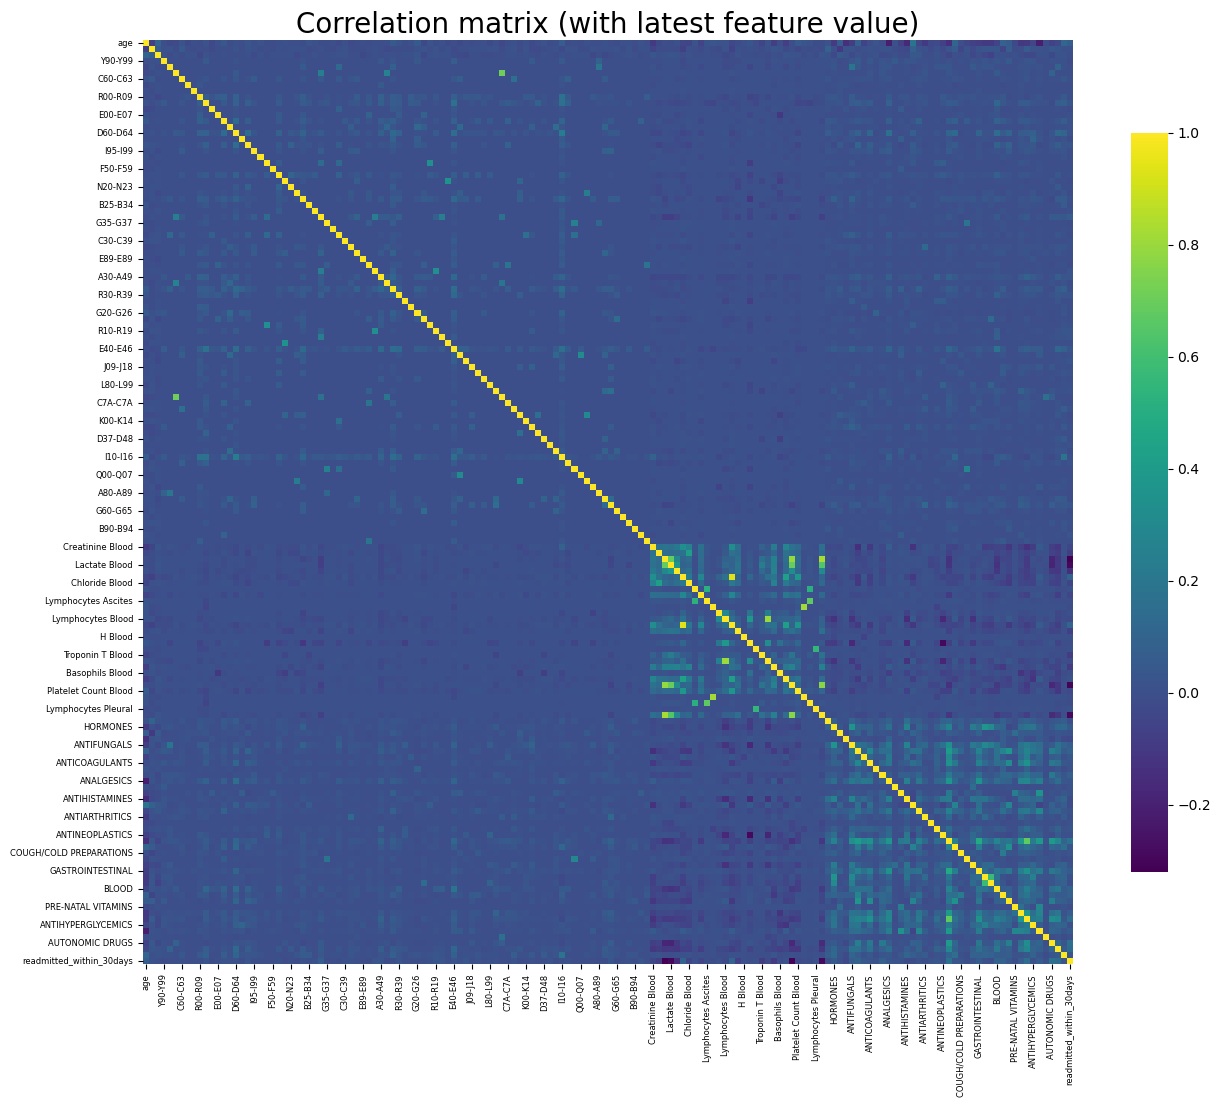

In [6]:
# correlation test (latest feature value)
feat_cols_latest = train_merged_df_latest.columns[9:].to_list()
corr_mat_latest = train_merged_df_latest[feat_cols_latest + ['readmitted_within_30days']].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_mat_latest, annot=False, fmt=".2f", cmap='viridis',  cbar_kws={"shrink": .8})
plt.title("Correlation matrix (with latest feature value)", fontsize=20)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

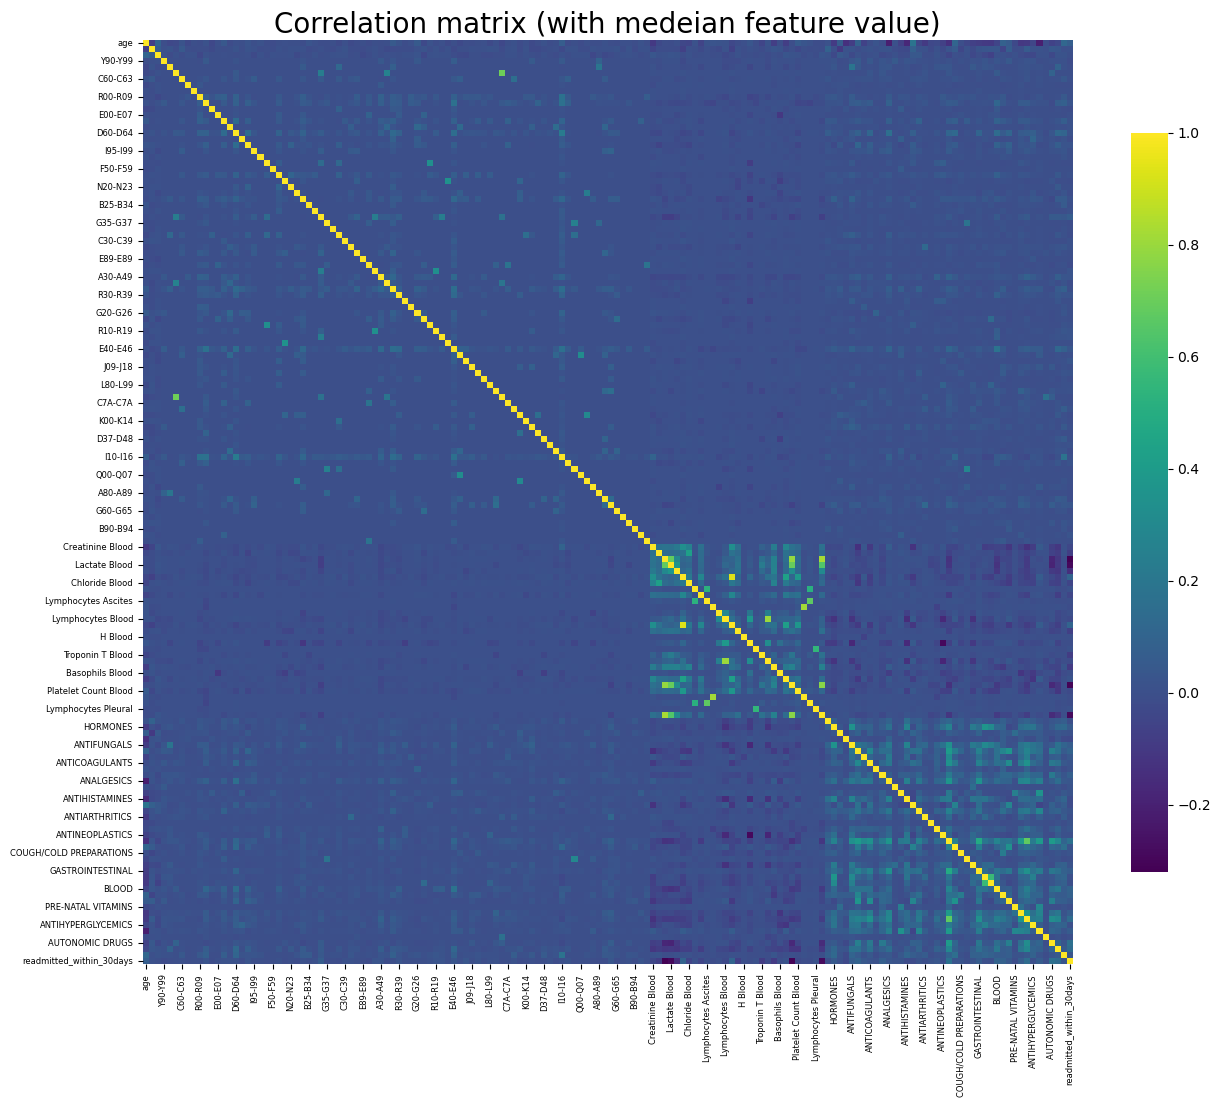

In [7]:
# correlation test (median feature value)
feat_cols_median = train_merged_df_median.columns[9:].to_list()
corr_mat_median = train_merged_df_median[feat_cols_median + ['readmitted_within_30days']].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_mat_latest, annot=False, fmt=".2f", cmap='viridis',  cbar_kws={"shrink": .8})
plt.title("Correlation matrix (with medeian feature value)", fontsize=20)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

In [8]:
# extract categorical features
cat_cols = [EHR['feature_cols'][i] for i in EHR['cat_idxs']]
icd_cols = EHR['icd_cols']

In [ ]:
# Plot categorical columns
print("Categorical features:")
num_rows = math.ceil(len(cat_cols_latest) / 5)
fig, axs = plt.subplots(num_rows, 5, figsize=(15, num_rows*3))
axs = axs.flatten()
for i, col in enumerate(cat_cols_latest):
    sns.countplot(x=col, data=train_merged_df_latest, ax=axs[i])
    axs[i].set_title(f'Distribution of\n {col}')
for i in range(len(cat_cols_latest), len(axs)):
    fig.delaxes(axs[i])
plt.tight_layout()
plt.show()

# Plot numerical columns
print("Numerical features:")
num_rows = math.ceil(len(num_cols_latest) / 5) * 2  # Multiply by 2 for histogram and boxplot rows
fig, axs = plt.subplots(num_rows, 5, figsize=(15, num_rows*3))
axs = axs.flatten()
for i, col in enumerate(num_cols_latest):
    sns.histplot(train_merged_df_latest[col], kde=True, ax=axs[i])  # Histogram on the first row
    sns.boxplot(x=train_merged_df_latest[col], ax=axs[i + len(num_cols_latest)])  # Boxplot on the second row
    axs[i].set_title(f'Histogram of\n {col}')
    axs[i + len(num_cols_latest)].set_title(f'Boxplot of\n {col}')
plt.tight_layout()
plt.show()

Categorical features:


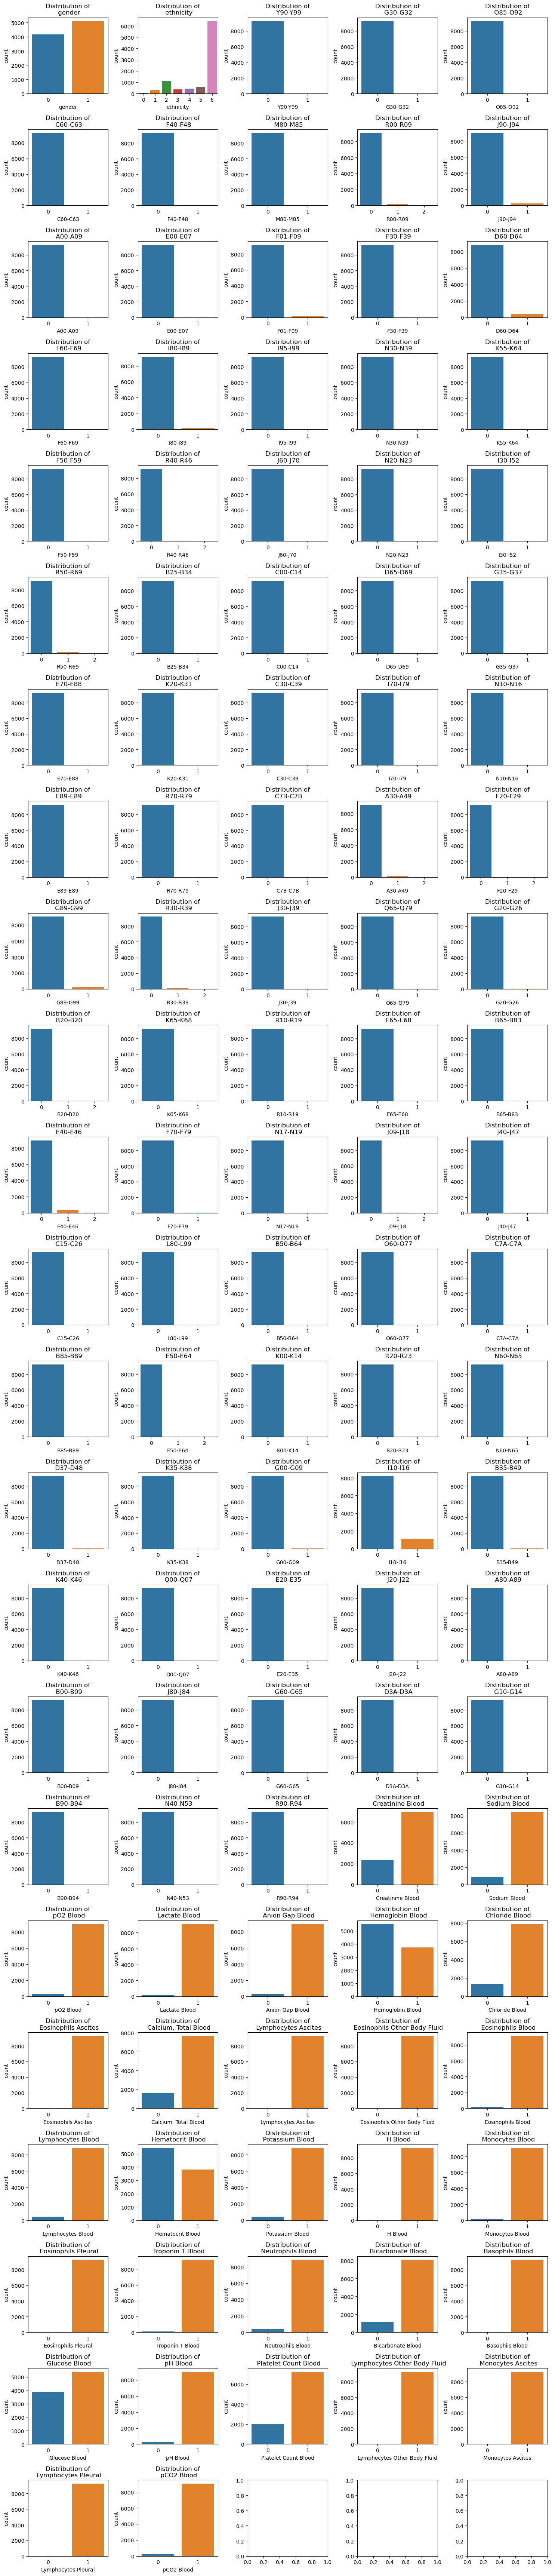

Numerical features:


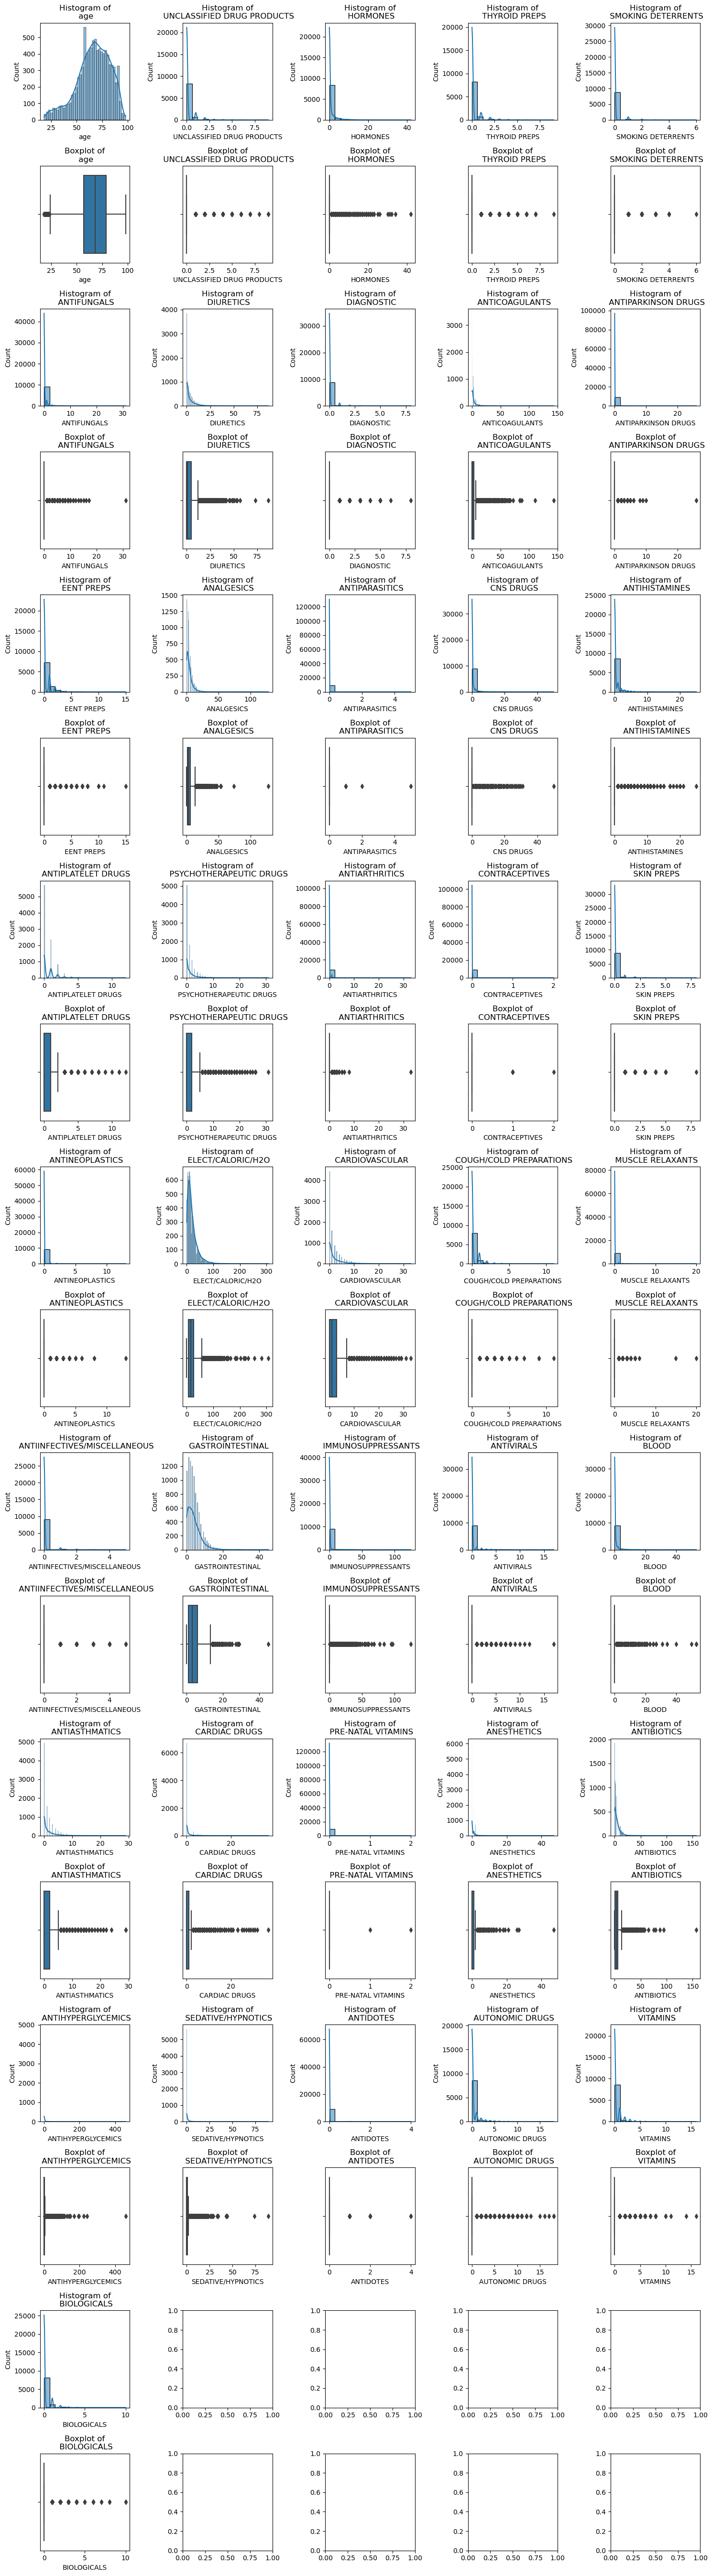

In [15]:
# plot distributions (latest feature value)
cat_cols_latest = [col for col in feat_cols_latest if col in cat_cols or col in icd_cols]
num_cols_latest = [col for col in feat_cols_latest if col not in cat_cols_latest]

# Plot categorical columns
print("Categorical features:")
num_rows = math.ceil(len(cat_cols_latest) / 5)
fig, axs = plt.subplots(num_rows, 5, figsize=(15, num_rows*3))
axs = axs.flatten()
for i, col in enumerate(cat_cols_latest):
    sns.countplot(x=col, data=train_merged_df_latest, ax=axs[i])
    axs[i].set_title(f'Distribution of\n {col}')
plt.tight_layout()
plt.show()

# Plot numerical columns
print("Numerical features:")
num_rows = math.ceil(len(num_cols_latest) / 5) * 2  
fig, axs = plt.subplots(num_rows, 5, figsize=(15, num_rows*3))
axs = axs.flatten()
for i, col in enumerate(num_cols_latest):
    row = (i // 5) * 2  
    sns.histplot(train_merged_df_latest[col], kde=True, ax=axs[row*5 + i%5])  
    sns.boxplot(x=train_merged_df_latest[col], ax=axs[(row+1)*5 + i%5])  
    axs[row*5 + i%5].set_title(f'Histogram of\n {col}')
    axs[(row+1)*5 + i%5].set_title(f'Boxplot of\n {col}')
plt.tight_layout()
plt.show()

Categorical features:


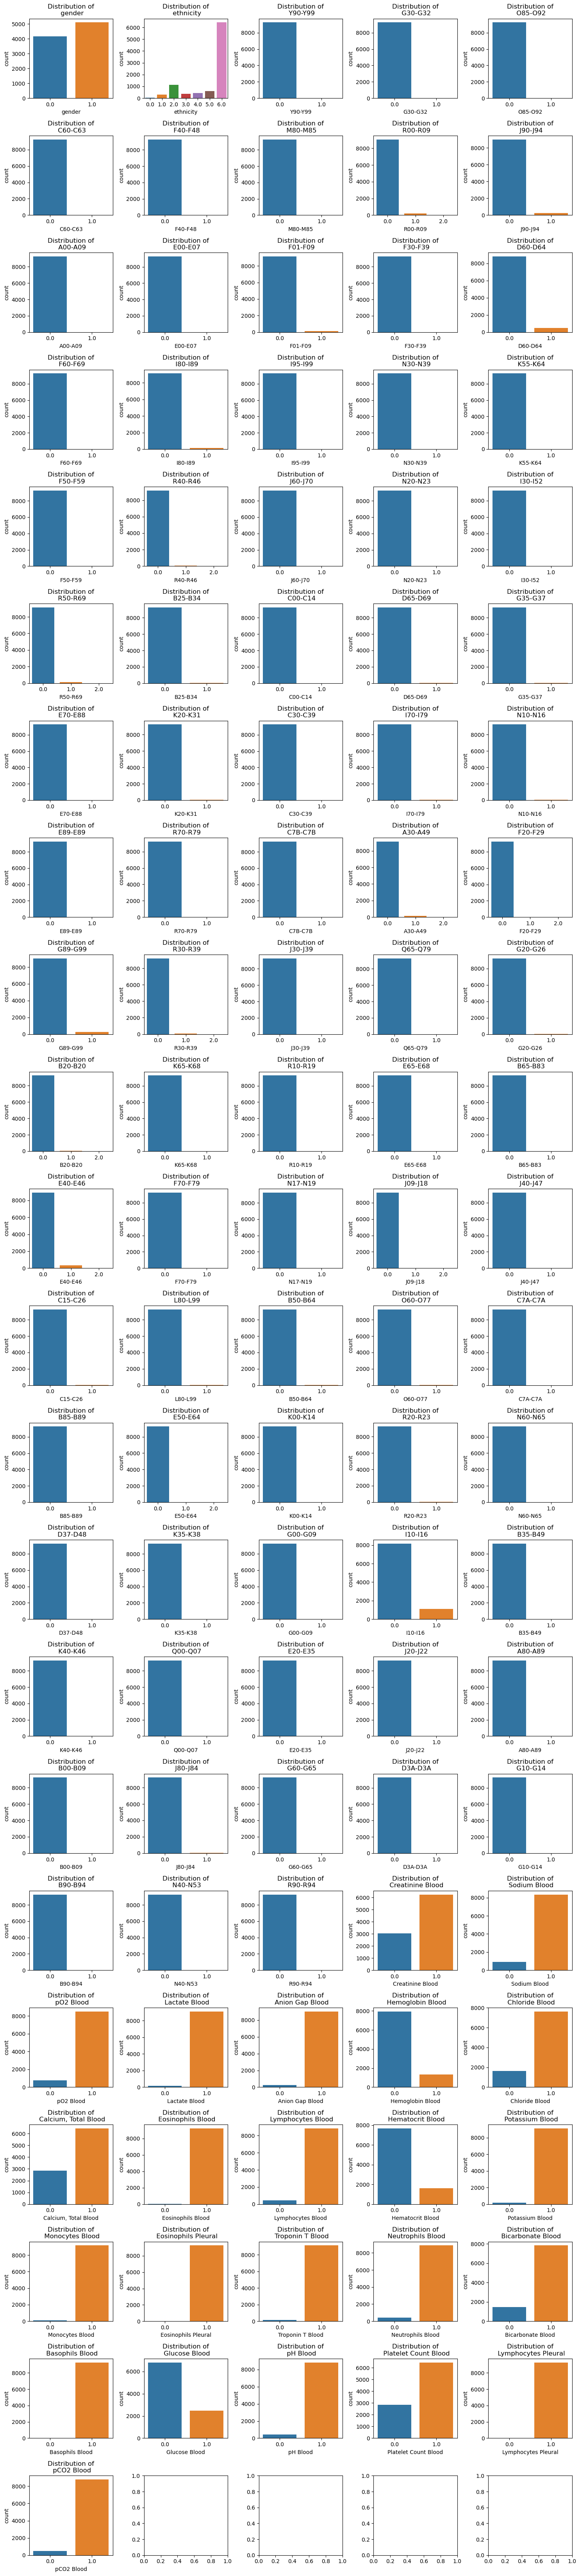

Numerical features:


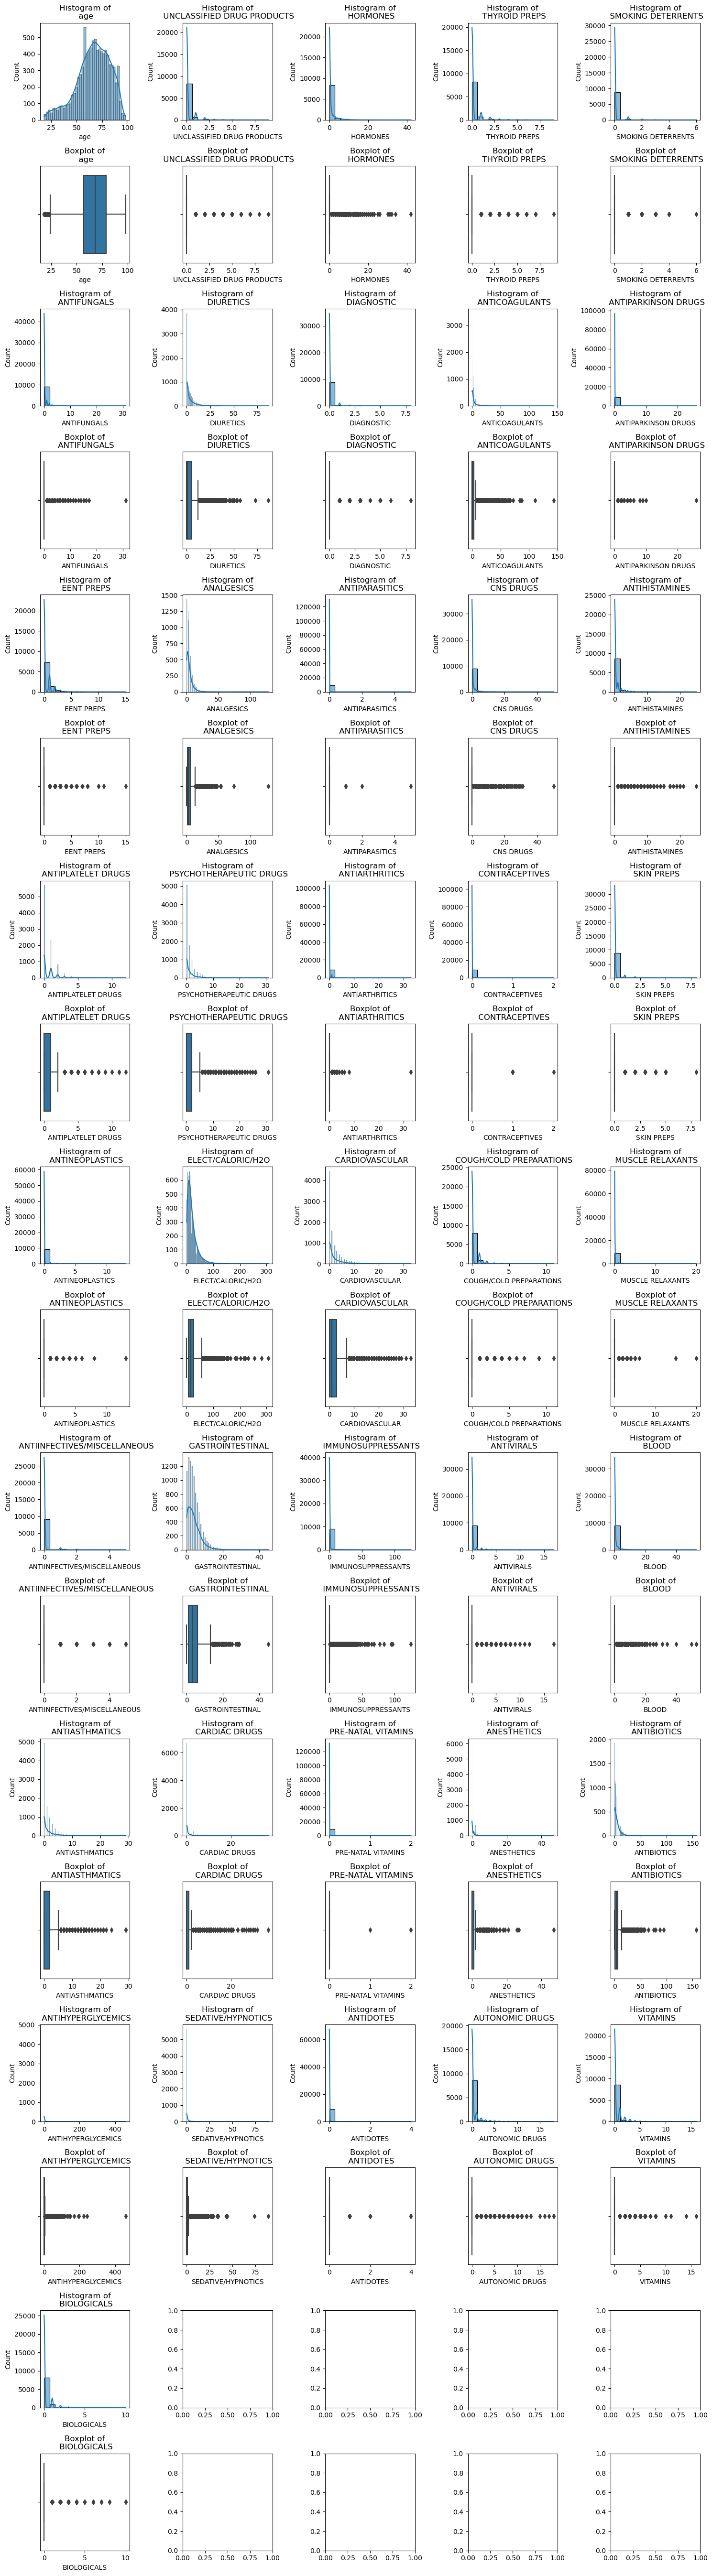

In [16]:
# plot distributions (median feature value)
cat_cols_median = [col for col in feat_cols_median if col in cat_cols or col in icd_cols]
num_cols_median = [col for col in feat_cols_median if col not in cat_cols_median]

# Plot categorical columns
print("Categorical features:")
num_rows = math.ceil(len(cat_cols_median) / 5)
fig, axs = plt.subplots(num_rows, 5, figsize=(15, num_rows*3))
axs = axs.flatten()
for i, col in enumerate(cat_cols_median):
    sns.countplot(x=col, data=train_merged_df_median, ax=axs[i])
    axs[i].set_title(f'Distribution of\n {col}')
plt.tight_layout()
plt.show()

# Plot numerical columns
print("Numerical features:")
num_rows = math.ceil(len(num_cols_median) / 5) * 2  
fig, axs = plt.subplots(num_rows, 5, figsize=(15, num_rows*3))
axs = axs.flatten()
for i, col in enumerate(num_cols_median):
    row = (i // 5) * 2  
    sns.histplot(train_merged_df_median[col], kde=True, ax=axs[row*5 + i%5])  
    sns.boxplot(x=train_merged_df_median[col], ax=axs[(row+1)*5 + i%5])  
    axs[row*5 + i%5].set_title(f'Histogram of\n {col}')
    axs[(row+1)*5 + i%5].set_title(f'Boxplot of\n {col}')
plt.tight_layout()
plt.show()